<font size="+7"> Proyecto Final Data Science "CAR X" </font >

---
 - **Autores**:   
 Felipe Moreira.
 Ignacio Araneda.
 Freddy Rodríguez.
 Tomas Valdés.

 - **Generación**: G58
 - **Modulo**: Proyecto Final Da Science
 - **Profesor**: Daniel Zuñiga
 - **Fecha**: 2023-08-09

# 1.-Definicion del Proyecto
“Car X”, es una Startup de “Compra y Venta” de automóviles, que está compuesta por un equipo de profesionales de primer nivel y en donde a través de la tecnologìa, logra diferenciar su servicio a través de la velocidad de su servicio  .Dentro de las tecnologías que apoyan al negocio, existe un activo tecnológico desarrollado por un equipo de Data Scientist de “Car X”, el cual implementa técnicas de machine learning para ofrecer una solución a la hora de valorizar un automóvil que se quiere vender.

# 1.1-Solución

Car X como StartUp, busca a través de un servicio de Compra y venta de autos, poder agilizar la venta de automóviles, para aquellos clientes americanos que deseen una pre-valorización en tiempo real de su automóvil.

Para gestionar dicha solucion procedemos a gestionar varios modelos procesando data.

# 1.3-Preliminares.
## Ajustes e importacion de librerias.

In [64]:
# Aspectos computacionales:

#librerias de preprocesamiento
import pandas as pd
import requests
import numpy as np

#Librerias para graficos
import matplotlib.pyplot as plt
import seaborn as sns

# Librerias para entrenamiento, y modelamiento
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

import xgboost as xgb

#otras librerias para uso del API
import requests
import os

# Ruta al archivo CSV
ruta_archivo = 'true_car_listings.csv'

# Cargar el archivo CSV en un DataFrame
data = pd.read_csv(ruta_archivo)

# Mostrar las primeras filas del DataFrame
data.head(2)

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed


# 1.4- Analisis Exploratorio
## Exploración  General de dataset

Evidenciamos que entre los datos que tenemos estan, el ultimo precio de comercializacion de los vehiculos, el año de fabricacion, la cantidad de millas de recorrido, la ciudad donde se encuentra, el estado, la marca, el modelo, y por ultimo el vin que es el serial identificador del vehiculo,el cual es unico para cada vehiculo dentro del pais.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


In [7]:
data.describe()

,Price,Year,Mileage
count,852122.000000,852122.000000,8.521220e+05
mean,21464.100210,2013.289145,5.250779e+04
std,13596.202241,3.414987,4.198896e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218600e+04
max,499500.000000,2018.000000,2.856196e+06


- En una Breve descripción de los datos utlizando .describe, podenmos ver que la que tenmos 852.122 donde no hay datos vacios dentro de nuestro dataframe, tambien la media de precio de los vehiculos es de $21.464 dolares, siendo tambien de un año promedio del 2013 y con unas millas de recorrido de 52.507.  

- Tambien teemos que el precio minimo de un auto es de $1.500 dolares, su año mas antiguo en este caso es de 1997, y la menor cantidad de recorrido para un auto es 5 milas.  

- Por el Contrario tenemos que el auto mas costoso es de  $499.500 doalres siendo el año mas nuevo para un auto 2018 y tambien el auto con mas recorrido en millas 2.856.196 millas.

- En cuanto los percentilas podemos ver que el 75% de los precios de los autos de nuestro dataframe estan por debajo de $26.995 dolares, tambien estan por debajo del 2016 en antiguedad y en millas por recorrido estan por debajo de 72.186 millas de recorrido.

# Complementación de datos


La información con la que contamos actualmente parece ser poco suficiente para poder realizar un buen modelo, es por esto que buscaremos mas información de cada venta de auto utilizando el codigo VIN que es un número unico de cada vehículo, en donde agregaremos datos como la cantidad de puertas del auto, airbags entre otros.

Los datos serán buscados y recopilados utilizando la API de NHTSA, la National Highway Traffic Safety Administration de USA que permite rescatar la información

Uno de los detalles principales de nuestro data set es escases de datos, por ende en nuestra investigacion conseguimos datos provenientes del repositorio api de la "NATIONAL HIGHWAY TRAFFIC SAFETY ADMINISTRATION, del departamento de transporte de Estados Unidos, la cual se encarga de registrar todos los vehiculos que han circulado por las carreteras y autopistas de este pais mediante el vehicle identification number conocido por sus siglas "VIN", el cual se encuantra proporcionado en nuestro dataframe, lamentablemente al momento de gestioniar la conexion se realiza de manera correcta pero al descargar y abrir el csv nos encontramos que indica que no tiene acceso al servicio. tema que estaremos resolviendo en las proximas entregas para asi tener una mejor calidad de datos para estudio.

In [8]:
# Contar el total de ciudades únicas en la columna 'City'
ciudades = data['City'].nunique()
estados = data['State'].nunique()
fabricantes = data['Make'].nunique()
models_per_make = data.groupby('Make')['Model'].nunique().reset_index()



# Mostrar el total de ciudades
print("cantidad de ciudades:", ciudades)
print("cantidad de estados:", estados)

print("cantidad de fabricantes:", fabricantes)
print(models_per_make)


cantidad de ciudades: 2553
cantidad de estados: 59
cantidad de fabricantes: 58
             Make  Model
0              AM      1
1           Acura     64
2            Alfa      1
3           Aston      1
4            Audi    114
5             BMW     63
6         Bentley     12
7           Buick     71
8        Cadillac     65
9       Chevrolet    200
10       Chrysler     48
11          Dodge    114
12           FIAT     27
13        Ferrari     19
14         Fisker      2
15           Ford    147
16   Freightliner      1
17            GMC     43
18        Genesis      4
19            Geo      1
20         HUMMER      8
21          Honda     88
22        Hyundai     76
23       INFINITI     99
24          Isuzu     11
25         Jaguar     53
26           Jeep     80
27            Kia     83
28    Lamborghini     13
29           Land      1
30          Lexus     27
31        Lincoln     53
32          Lotus      6
33           MINI      6
34       Maserati     18
35        Maybach    

En es codigo procedimos a contar los valores unicos de las columnas City, State y Make, con  .nunique podemos contar los valores únicos en una serie de datos. despues procedimos a crear un dataframe llamado modelos por marca donde agrupamos los datos de los fabricantes con la cantidad de modelos unicos y procedemos a la visualizar la cantidad de ciudades, estados, fabricantes, y ademas imprimos el dataframe donde vemos la cantidad de modelos por fabricante.

# 2.- Graficación de  Variables

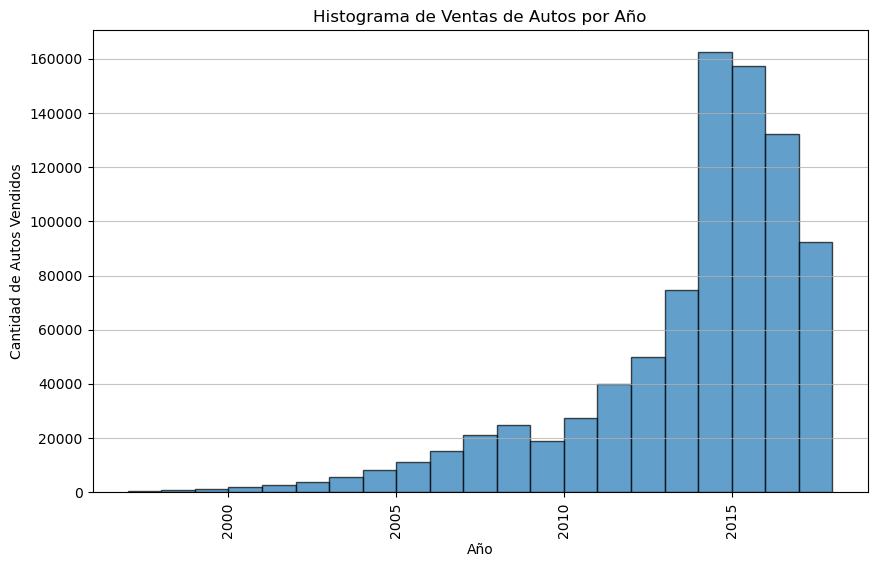

In [9]:

# Analisis del mercado objetivo por año del auto

plt.figure(figsize=(10, 6))
plt.hist(data['Year'], bins=range(min(data['Year']), max(data['Year']) + 1), edgecolor='black', alpha=0.7)
plt.xlabel('Año')
plt.ylabel('Cantidad de Autos Vendidos')
plt.title('Histograma de Ventas de Autos por Año')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x
plt.grid(axis='y', alpha=0.75)

# Mostrar el histograma
plt.show()

En presente histograma podemos evidenciar que desde el mayoria de los vehiculos pertinecientes a esta data son de años fabricacion desde el 2014 en hasta el 2018 teniendo la mayor cantidad de datos en en el año 2015.

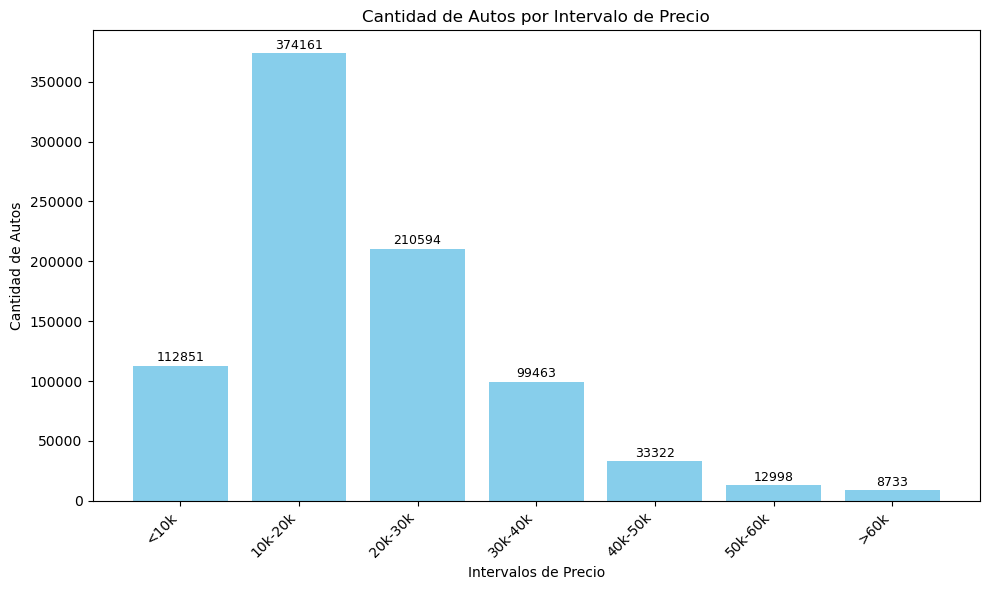

In [10]:
#Analisis del mercado objetivo por precio del auto

# Definir los intervalos de precio
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, data['Price'].max()]

# Crear la columna PriceInterval
data['PriceInterval'] = pd.cut(data['Price'], bins=bins, labels=['<10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k-60k', '>60k'])

# Obtener el conteo de autos por intervalo
interval_counts = data['PriceInterval'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(interval_counts.index, interval_counts.values, color='skyblue')
plt.xlabel('Intervalos de Precio')
plt.ylabel('Cantidad de Autos')
plt.title('Cantidad de Autos por Intervalo de Precio')
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas con los valores en las barras
for i, v in enumerate(interval_counts.values):
    plt.text(i, v + 1000, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

En presente codigo creamos una columna llamada PriceInterval para obtener el conteo de autos por intervalos de precio y asi graficarlo.

En el histograma de precios podemos ver que mayor concentracion de precios de los autos estan entre 0 y 40.000 dolares, tambien podmeos ver que la mayoria de los autos tienen un precio osila entre 10.000 y 20.000 dolares.

In [11]:
data['Mileage'].max()

2856196

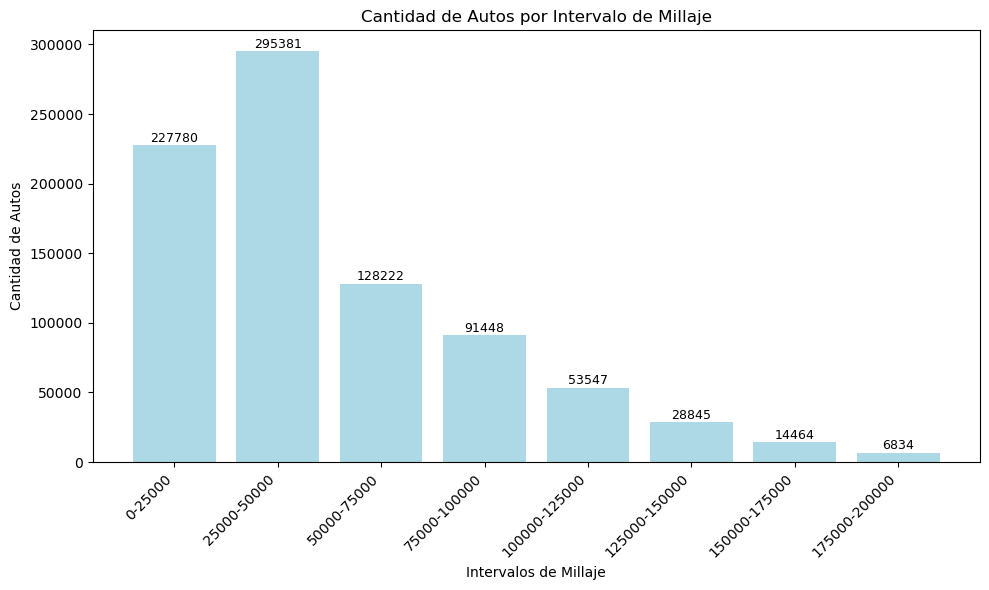

In [12]:
# Modificacion del grafico de arriba con intervalos de 10000 millas

# Definir los intervalos de millaje
mileage_bins = list(range(0, 200000 + 25000, 25000))

# Crear la columna MileageInterval
data['MileageInterval'] = pd.cut(data['Mileage'], bins=mileage_bins, labels=['{}-{}'.format(start, start+25000) for start in mileage_bins[:-1]])

# Obtener el conteo de autos por intervalo de millaje
mileage_interval_counts = data['MileageInterval'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(mileage_interval_counts.index, mileage_interval_counts.values, color='lightblue')
plt.xlabel('Intervalos de Millaje')
plt.ylabel('Cantidad de Autos')
plt.title('Cantidad de Autos por Intervalo de Millaje')
plt.xticks(rotation=45, ha='right')

# Agregar etiquetas con los valores en las barras
for i, v in enumerate(mileage_interval_counts.values):
    plt.text(i, v + 100, str(v), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

En presente codigo creamos una columna llamada MileageInterval para obtener el conteo de autos por millaje y asi graficarlo.


Podemos observar que la muestra esta bastante dispersa enncuanto a los rangos de millaje de recorrido prodominando la cantidad de vheiculos oscilan entre 525.000 y 50.000 millas, seguida por los que oslian entre los 0.000 y 25.000 millas.

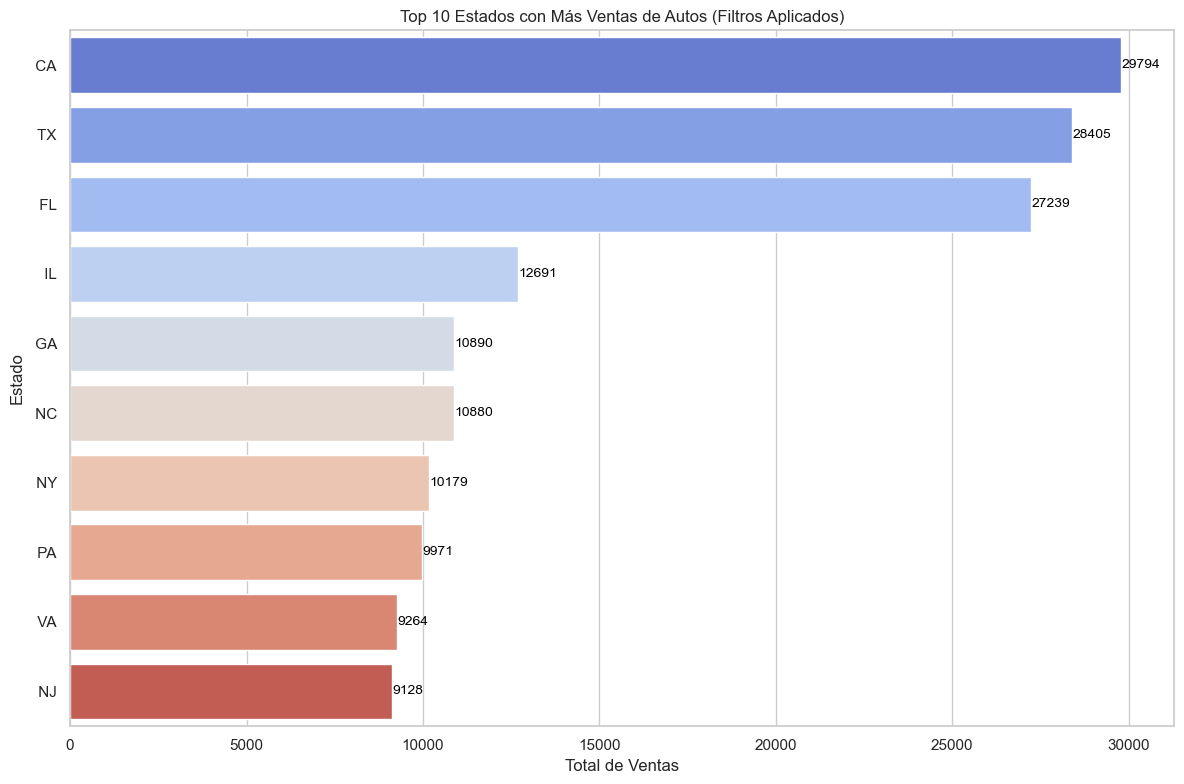

In [13]:
# Ventas de autos por ciudad

# Aplicar los filtros
filtered_data = data[(data['Year'] >= 2014) & (data['Mileage'] < 40000) & (data['Price'] >= 10000) & (data['Price'] <= 30000)]

# Calcular las ventas totales por estado ('State') después de aplicar los filtros
total_sales_by_state = filtered_data['State'].value_counts().reset_index()
total_sales_by_state.columns = ['State', 'Total Sales']

# Seleccionar los 10 estados con más ventas
top_10_states = total_sales_by_state.head(10)

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear un gráfico de barras de los 10 estados con más ventas después de aplicar los filtros
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Sales', y='State', data=top_10_states, palette='coolwarm')
plt.title('Top 10 Estados con Más Ventas de Autos (Filtros Aplicados)')
plt.xlabel('Total de Ventas')
plt.ylabel('Estado')
plt.tight_layout()

# Agregar etiquetas con los valores en las barras
for i, v in enumerate(top_10_states['Total Sales']):
    plt.text(v + 10, i, str(v), va='center', fontsize=10, color='black')

plt.show()






En el presente grafico realizamos una representacion del top 10 estados con mas ventas despues de haber aplicado los filtros donde los autos no posean mas 40.000 millas de recorrido y tambien se encuentren en un rango de precio mayores a 10.000 dolares y menores a 30.000 dolares, donde se puede evidenciar que el estado con mas ventas en California, seguido de Texas y Florida.

In [14]:
data['CarIdentifier'] = data['Make'] + ' ' + data['Model'] + ' ' + data['Year'].astype(str)

Caridentifiers=data['CarIdentifier'].nunique()
print(Caridentifiers)

data

9285


,Price,Year,Mileage,City,State,Vin,Make,Model,PriceInterval,MileageInterval,CarIdentifier
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,<10k,25000-50000,Acura ILX6-Speed 2014
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed,10k-20k,0-25000,Acura ILX5-Speed 2013
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,<10k,25000-50000,Acura ILX6-Speed 2013
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed,10k-20k,25000-50000,Acura ILX5-Speed 2014
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic,10k-20k,0-25000,Acura ILXAutomatic 2016
...,...,...,...,...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6,>60k,0-25000,Volvo S90T6 2017
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6,>60k,0-25000,Volvo XC90T6 2017
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD,50k-60k,25000-50000,Volvo XC90AWD 2016
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90,>60k,0-25000,Volvo V90 2017


Procedemos a agregar una nueva columna llamada CarIdentifier donde combinamos la informacion de marca del vehiculo con con modelo y año del mismo, despues lo almacenamos en la variable caridentifiers para obtener un total de 9285 valores unicos entre vehiculos con marca modelo y año.

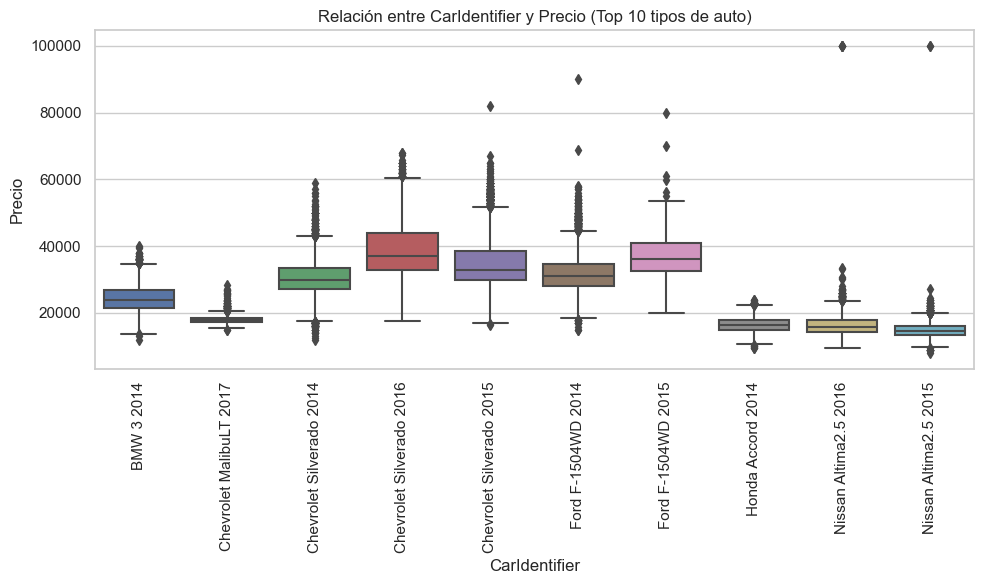

In [15]:
# Visualizar la relación entre CarIdentifier y precio (muestra los 10 principales)
top_identifiers = data['CarIdentifier'].value_counts().head(10).index
plt.figure(figsize=(10, 6))
sns.boxplot(x='CarIdentifier', y='Price', data=data[data['CarIdentifier'].isin(top_identifiers)])
plt.title('Relación entre CarIdentifier y Precio (Top 10 tipos de auto)')
plt.xlabel('CarIdentifier')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

En el presente Boxplot procedemos a anlizar relacion entre el top 10 vehiculos que mas comunes del data set y sus precios, logrando inferir que para  cada uno de los casos los precios no excenden los $60.000 dolares de forma promediadda y tampoco estan por debajo de los 10.000 dolares teniendo para cada uno los siguientes datos:
- Bmw_3_2014 = precios entre 20.000 y 40.000
- Chevrolet_Silverado_2014 = precios entre 20.000 y 40.000
- Chevrolet_Silverado_2015 = precios entre 20.000 y 40.000
- Chevrolet_Silverado_2016 = precios entre 30.000 y 50.000
- Ford_F-1504WD_2014 = precios entre 30.000 y 40.000
- Ford_F-1504WD_2015 = precios entre 35.000 y 50.000
- Nissan_Altima2.5_2015 = precios entre 10.000 y 20.000
- Nissan_Altima2.5_2016 = precios entre 15.000 y 25.000
- Honda_Accord_2014 = precios entre 15.000 y 20.000
- Chevrolet_MalibuLT_2017 = precios entre 15.000 y 20.000

/var/folders/76/j8c02qms507335nstkz_08r00000gn/T/ipykernel_15093/2744460048.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter_plot = sns.scatterplot(x='Price', y='Make', size='Price', data=average_value_by_make, sizes=(20, 200), palette='tab20')


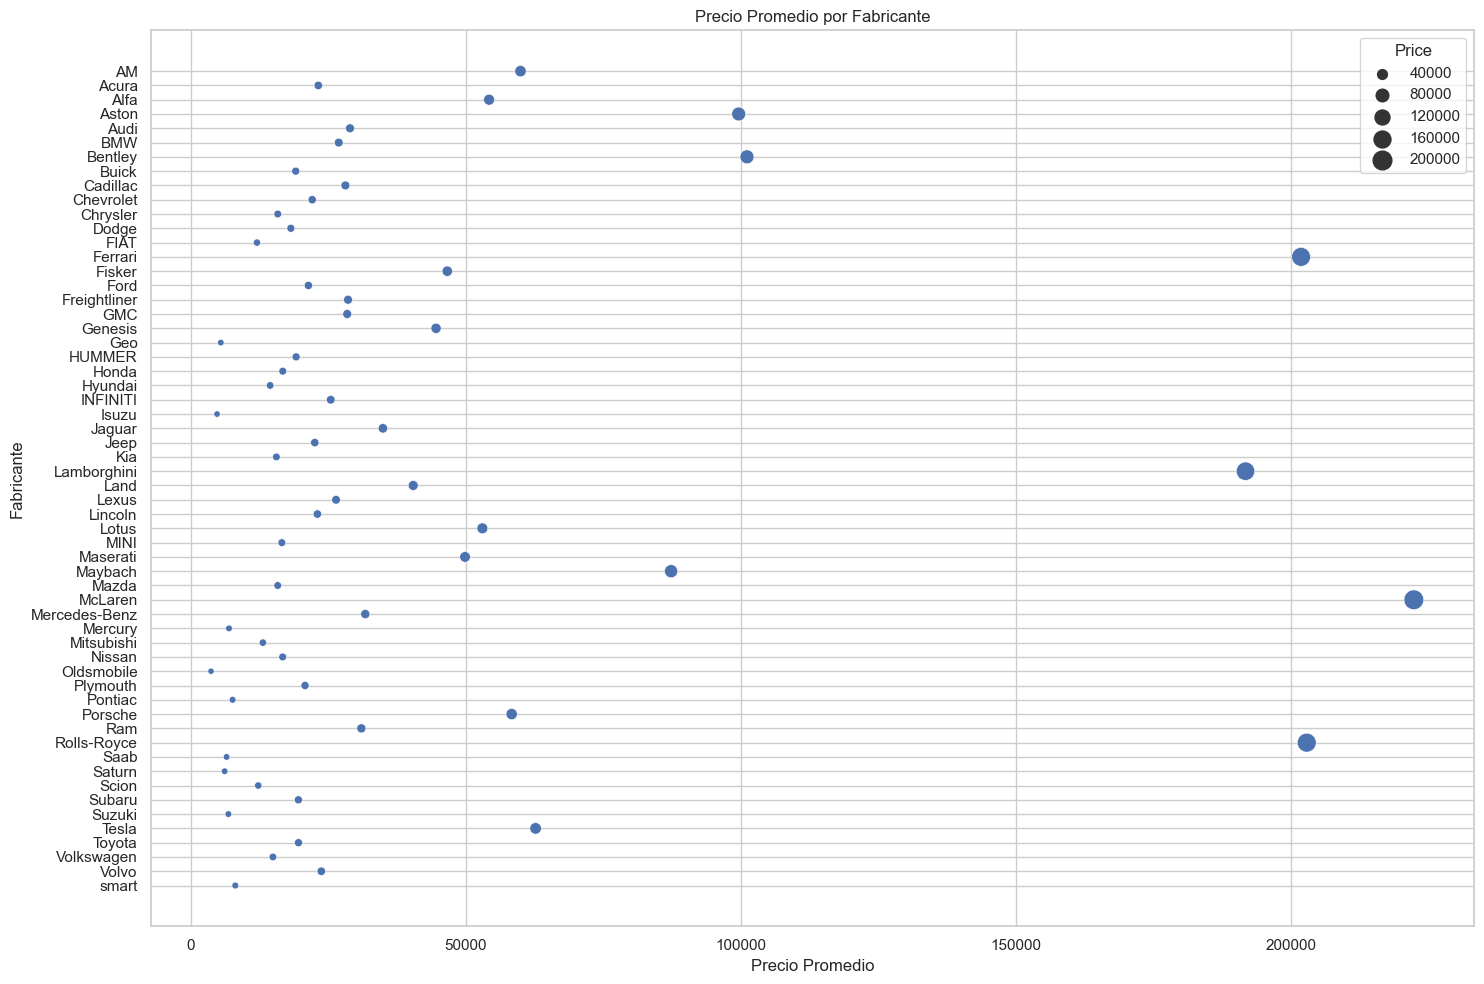

In [16]:
# Calcular el valor promedio por fabricante ('Make')
average_value_by_make = data.groupby('Make')['Price'].mean().reset_index()

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear un gráfico de dispersión con colores por fabricante (Make) y tamaño por precio promedio
plt.figure(figsize=(15, 10))
scatter_plot = sns.scatterplot(x='Price', y='Make', size='Price', data=average_value_by_make, sizes=(20, 200), palette='tab20')
plt.title('Precio Promedio por Fabricante')
plt.xlabel('Precio Promedio')
plt.ylabel('Fabricante')
plt.tight_layout()
plt.show()

En este grafico de dispersion podemos ver que la gran cantidad de las marcas de autos manejan un precio promedio precio de vehiculos  entre los  0- 50.000 dolares, mientras solo 4 marcas puede ser catalogadas como de venta de vehiculos sobre los 150.000 dolares de precio de cada uno, estas marcas serian:
- Rolls-Royce.
- MacLaren.
- Lamborghini.
- Ferrari.

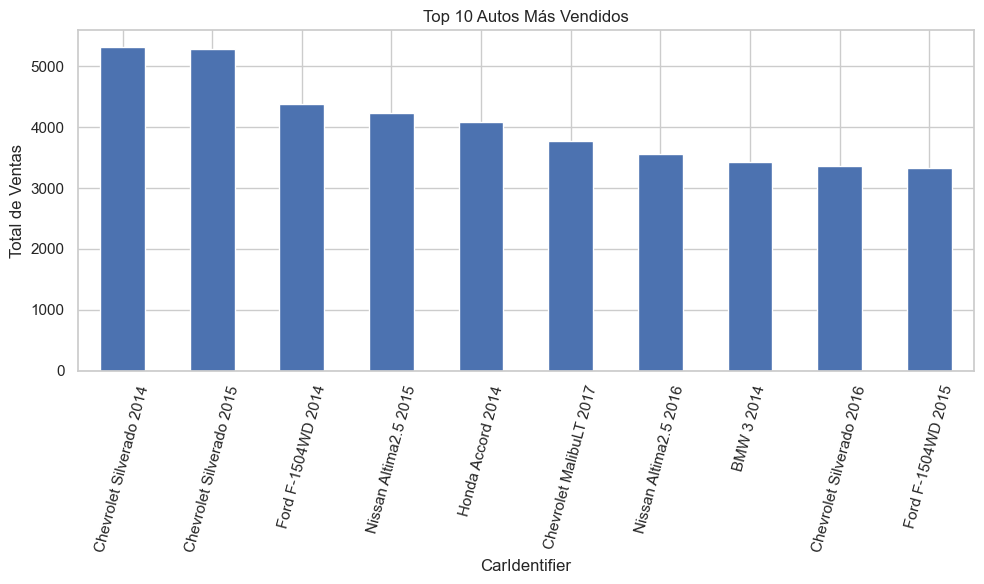

In [17]:
# Calcular el total de ventas por CarIdentifier
top_10_cars = data['CarIdentifier'].value_counts().head(10)

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear un gráfico de barras de los 10 autos más vendidos
plt.figure(figsize=(10, 6))
top_10_cars.plot(kind='bar')
plt.title('Top 10 Autos Más Vendidos')
plt.xlabel('CarIdentifier')
plt.ylabel('Total de Ventas')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

Podemos evidenciar que los top 10 autos mas vendidos pertecene al rango de 0-50.000 dolares descrito en el grafico anterior tambien podemos ver que estan distribuidos en solo 5 marcas, y en total todas han tenido mas de 3000 ventas por modelo.

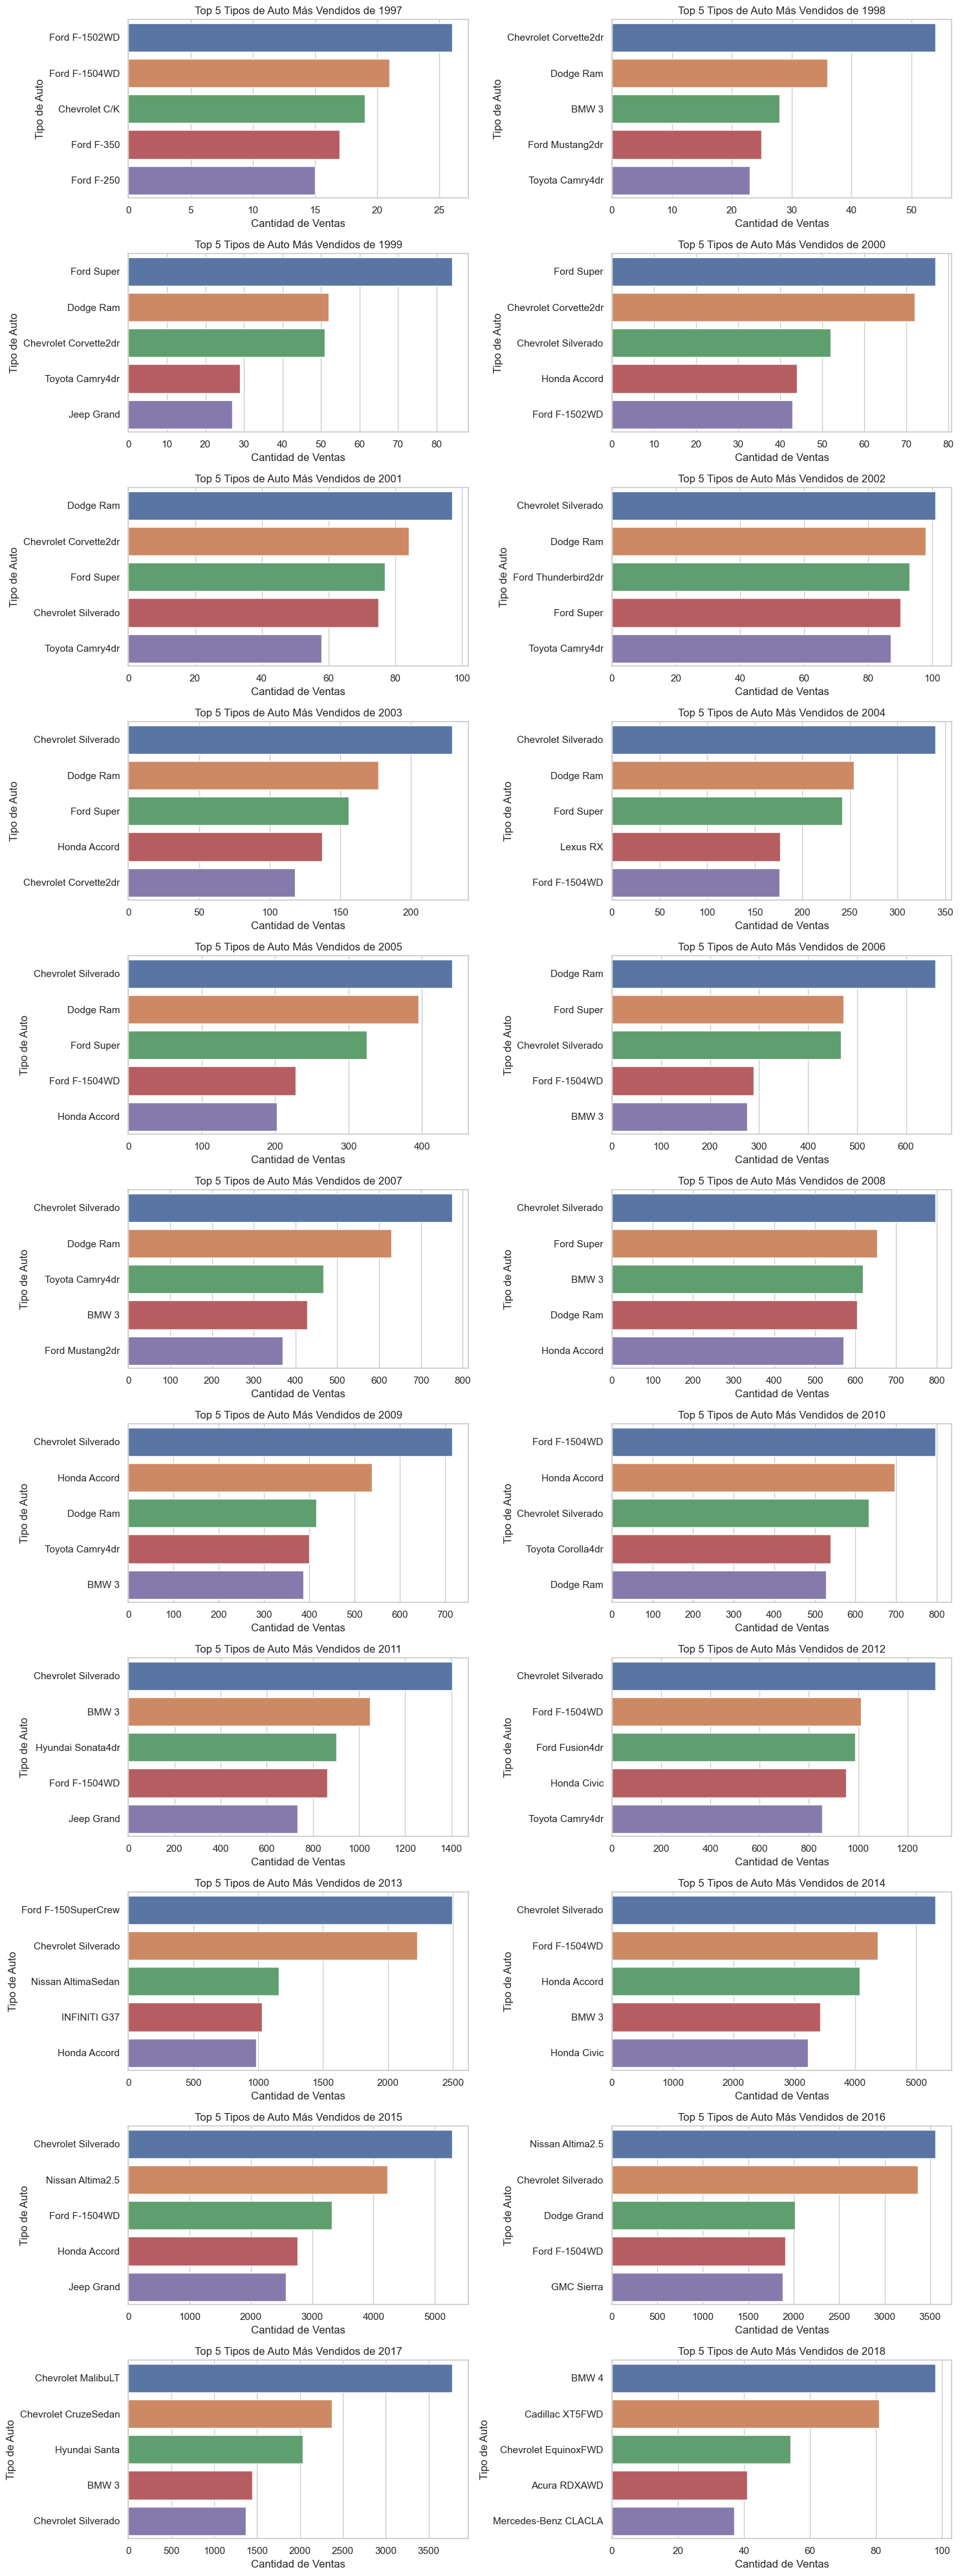

In [18]:
# Crear la columna CarType concatenando Make y Model
data['CarType'] = data['Make'] + ' ' + data['Model']

# Convertir 'Year' a entero
data['Year'] = data['Year'].astype(int)

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Obtener los 5 tipos de auto más vendidos por año
top_5_by_year = data.groupby('Year')['CarType'].value_counts().groupby(level=0).head(5).reset_index(name='Count')

# Crear subplots para cada año mostrando los 5 tipos de auto más vendidos
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(15, 40))
fig.subplots_adjust(hspace=0.5)

for i, year in enumerate(range(1997, 2019)):
    row = i // 2
    col = i % 2
    year_data = top_5_by_year[top_5_by_year['Year'] == year]
    ax = sns.barplot(x='Count', y='CarType', data=year_data, ax=axes[row, col])
    ax.set_title(f'Top 5 Tipos de Auto Más Vendidos de {year}')
    ax.set_xlabel('Cantidad de Ventas')
    ax.set_ylabel('Tipo de Auto')
    ax.tick_params(axis='y', labelrotation=0)

# Ajustar el espaciado y mostrar los subplots
plt.tight_layout()
plt.show()

En los graficos anteriores podemos observar el aumento de las transacciones entre los vehiculos mas vendedidos por año desde el año 1997 hasta el año 2018, donde podemos ver que los vehiculos que mas repiten en todos los graficos son Chevrolet Silverado, y Ford F-150 4wd. tambien podemos ver como la cantidad de vehiculos del top 5 aumento desde 1997 con alrededor de 25 para el mas vendiedo mientras que en 2017 llego a mas de 3500 unidades para el mas vendido.

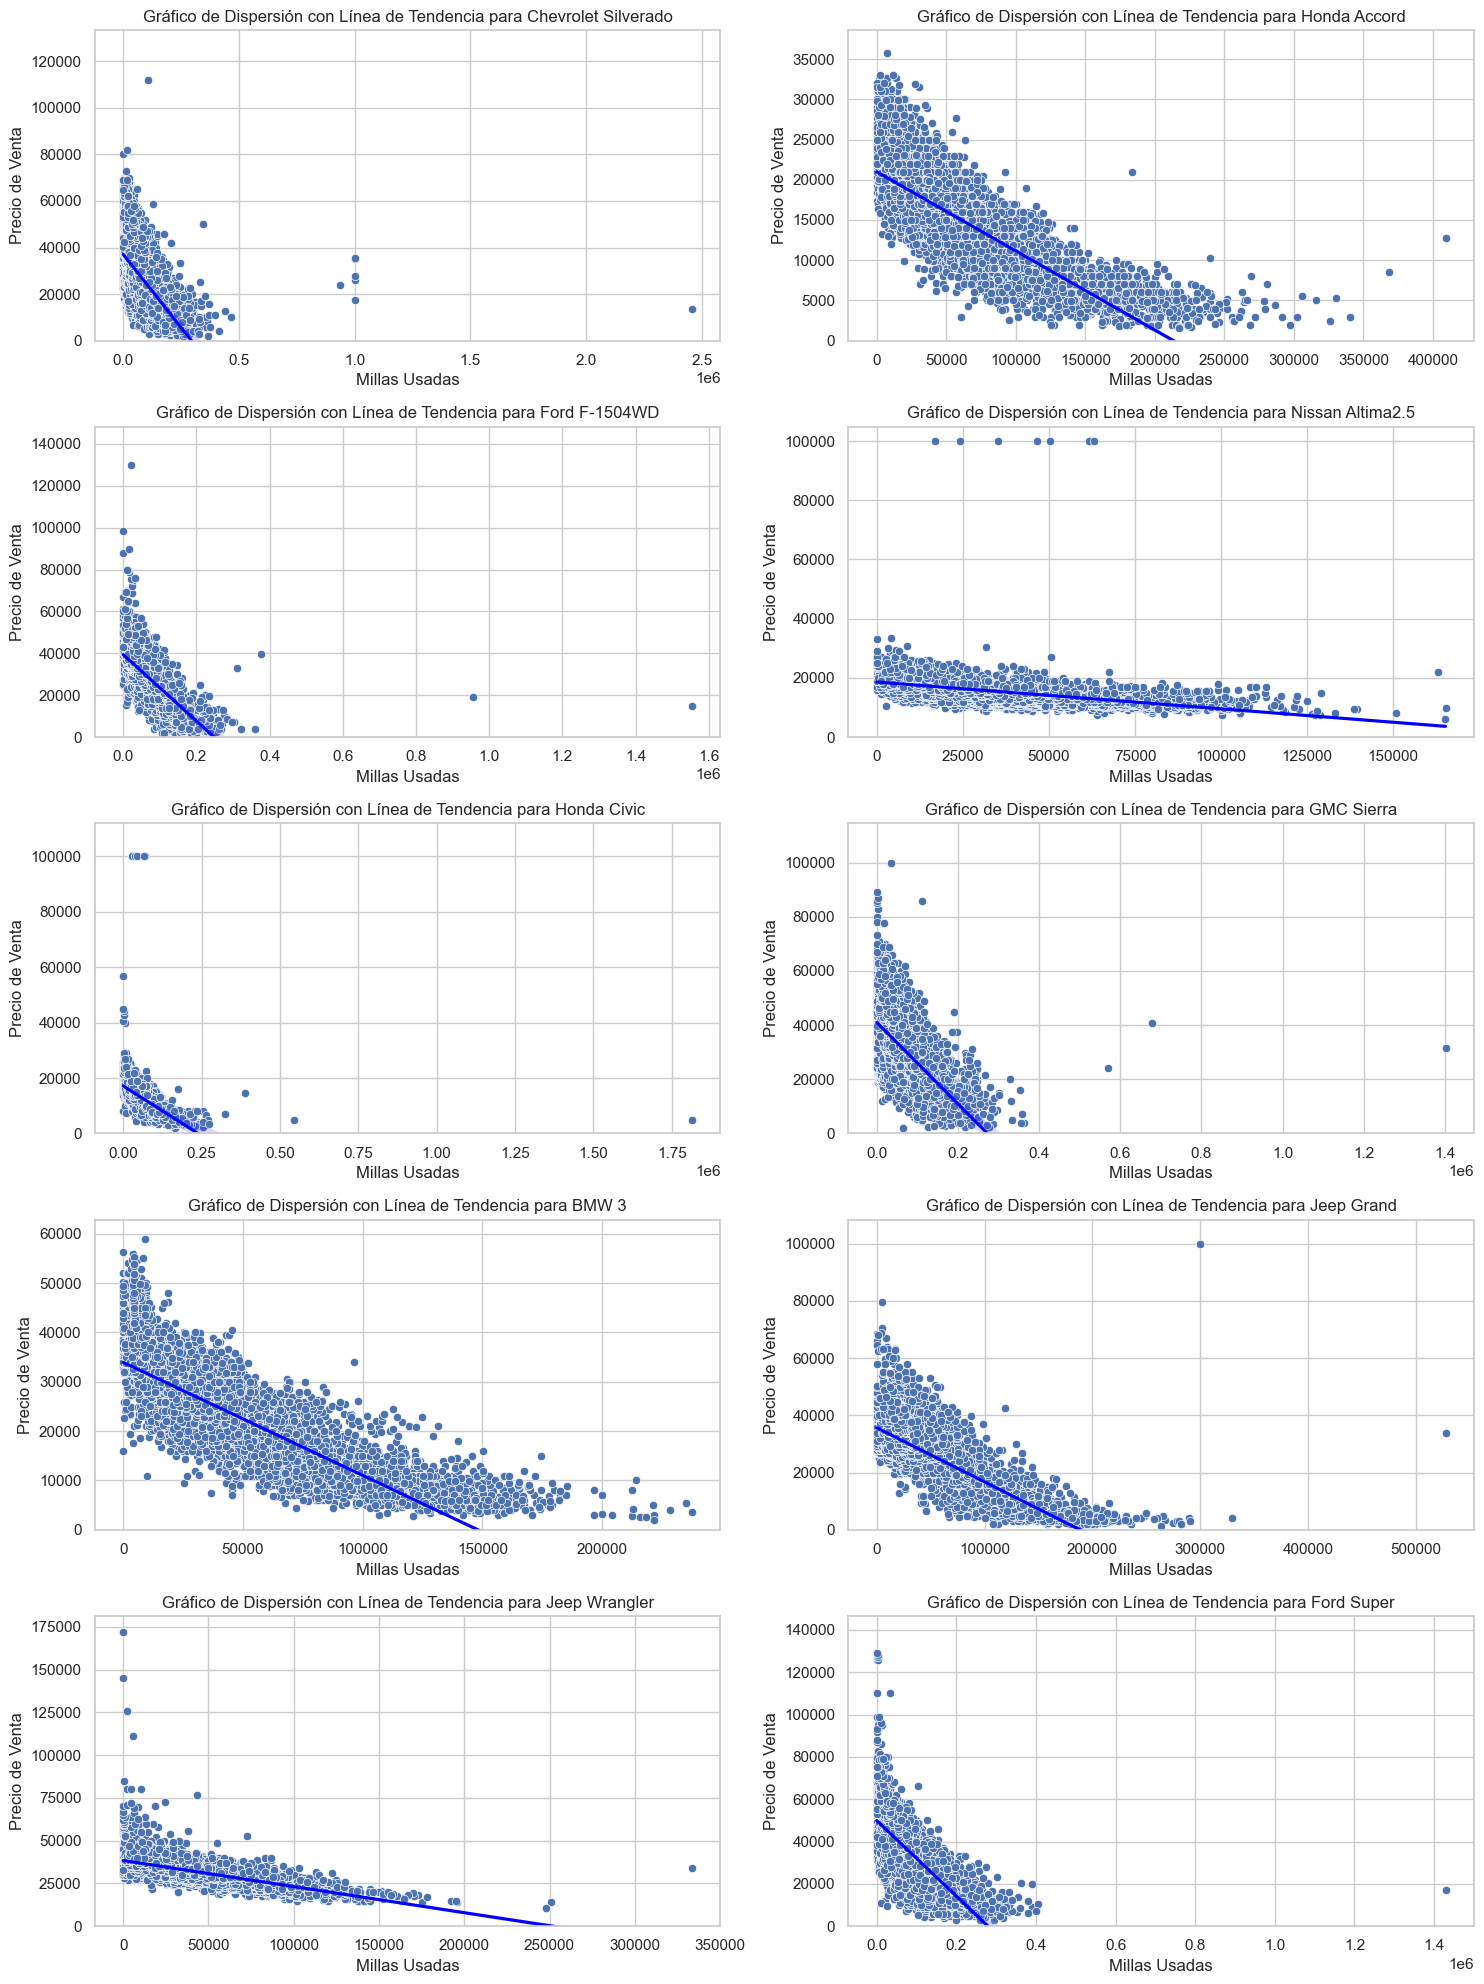

In [19]:
# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Obtener los 10 tipos de auto más vendidos
top_10_cars = data['CarType'].value_counts().head(10).index.tolist()

# Crear subplots de 2 columnas para los gráficos de dispersión
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

for i, car_type in enumerate(top_10_cars):
    row = i // 2
    col = i % 2
    car_data = data[data['CarType'] == car_type]
    ax = sns.scatterplot(x='Mileage', y='Price', data=car_data, ax=axes[row, col])
    sns.regplot(x='Mileage', y='Price', data=car_data, scatter=False, ax=ax, color='r', line_kws={"color": "blue"})
    ax.set_title(f'Gráfico de Dispersión con Línea de Tendencia para {car_type}')
    ax.set_xlabel('Millas Usadas')
    ax.set_ylabel('Precio de Venta')
    ax.set_ylim(bottom=0)  # Ajustar el límite inferior del eje y

# Ajustar el espaciado y mostrar los subplots
plt.tight_layout()
plt.show()

Podemos envidenciar en este grafico de dipersion  la relacion de nuestros top 10 autos mas comercializados con su precio y su millaje. en este caso el BmW 3 es el mas disperso entre precios y millas como podemos observar mientras que Honde Civic es el menos disperso entre millas y precios.

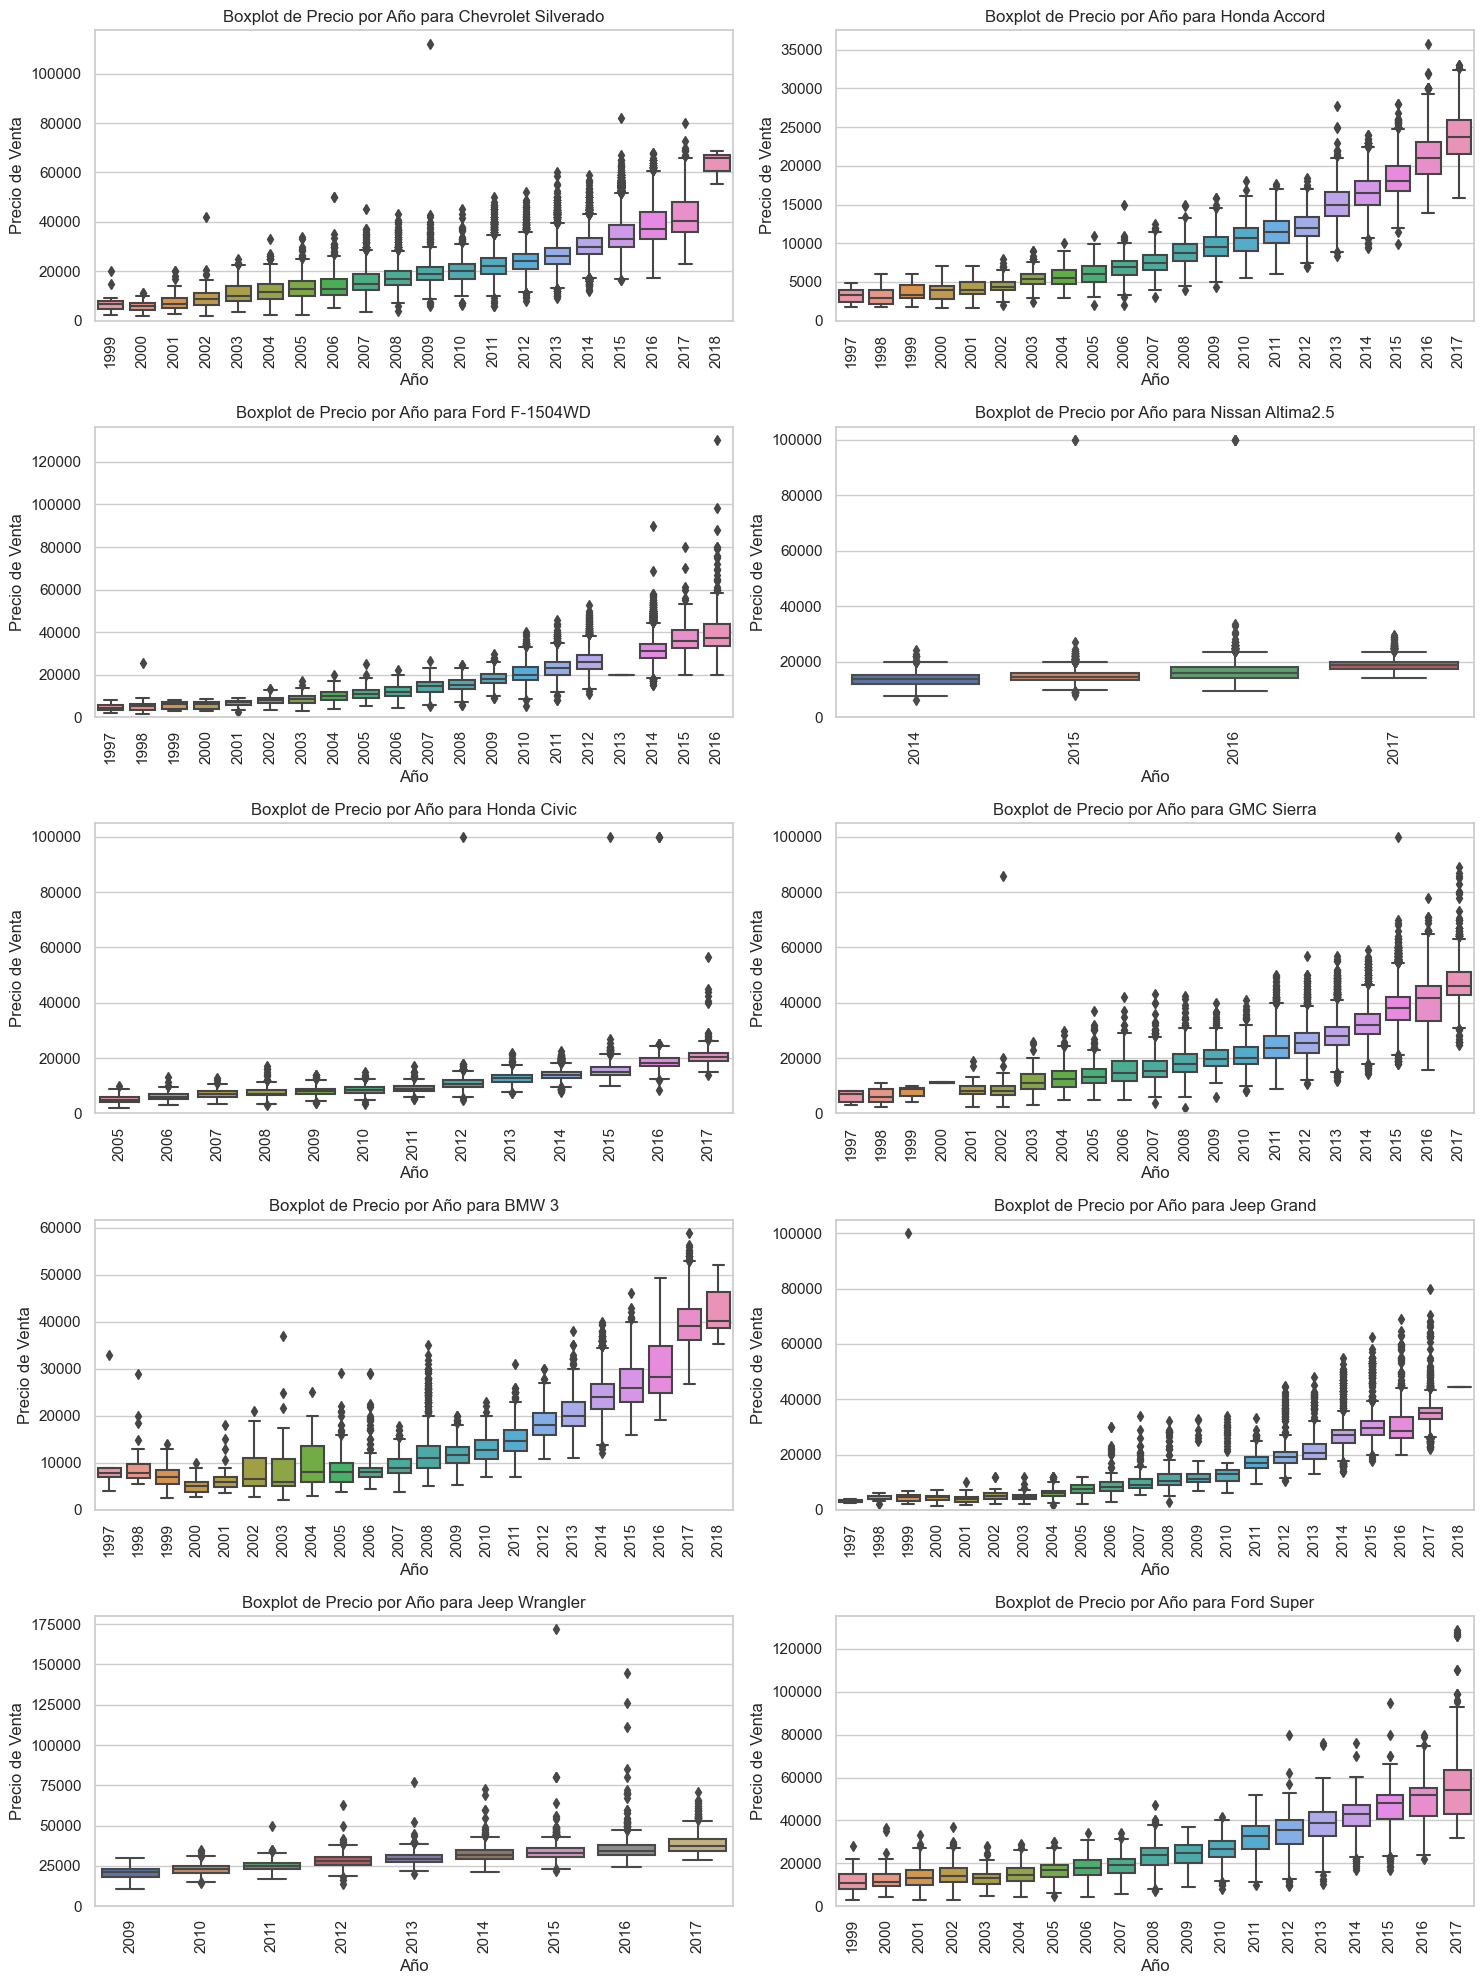

In [20]:
# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Obtener los 10 tipos de auto más vendidos
top_10_cars = data['CarType'].value_counts().head(10).index.tolist()

# Crear subplots de 2 columnas para los gráficos de boxplot
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.5)

for i, car_type in enumerate(top_10_cars):
    row = i // 2
    col = i % 2
    car_data = data[data['CarType'] == car_type]
    ax = sns.boxplot(x='Year', y='Price', data=car_data, ax=axes[row, col])
    ax.set_title(f'Boxplot de Precio por Año para {car_type}')
    ax.set_xlabel('Año')
    ax.set_ylabel('Precio de Venta')
    ax.set_ylim(bottom=0)  # Ajustar el límite inferior del eje y
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotación de los años en el eje x

# Ajustar el espaciado y mostrar los subplots
plt.tight_layout()
plt.show()

Para el caso de los presentes graficos estudiamos en forma de Boxplot la relacion entre los precios de venta y los años del top 10 de modelos de vehiculos, evidencia que los medelos que mas repiten en el transcurso de los años son la jeep Grand cherokee con ventas en todos los años total de 22 años con ventas, la GMC Sierra dentro del listado  en total 21 años con ventas.

/var/folders/76/j8c02qms507335nstkz_08r00000gn/T/ipykernel_15093/2584598417.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='CarIdentifier', y='Price', hue='State', data=scatter_data, ci=None)


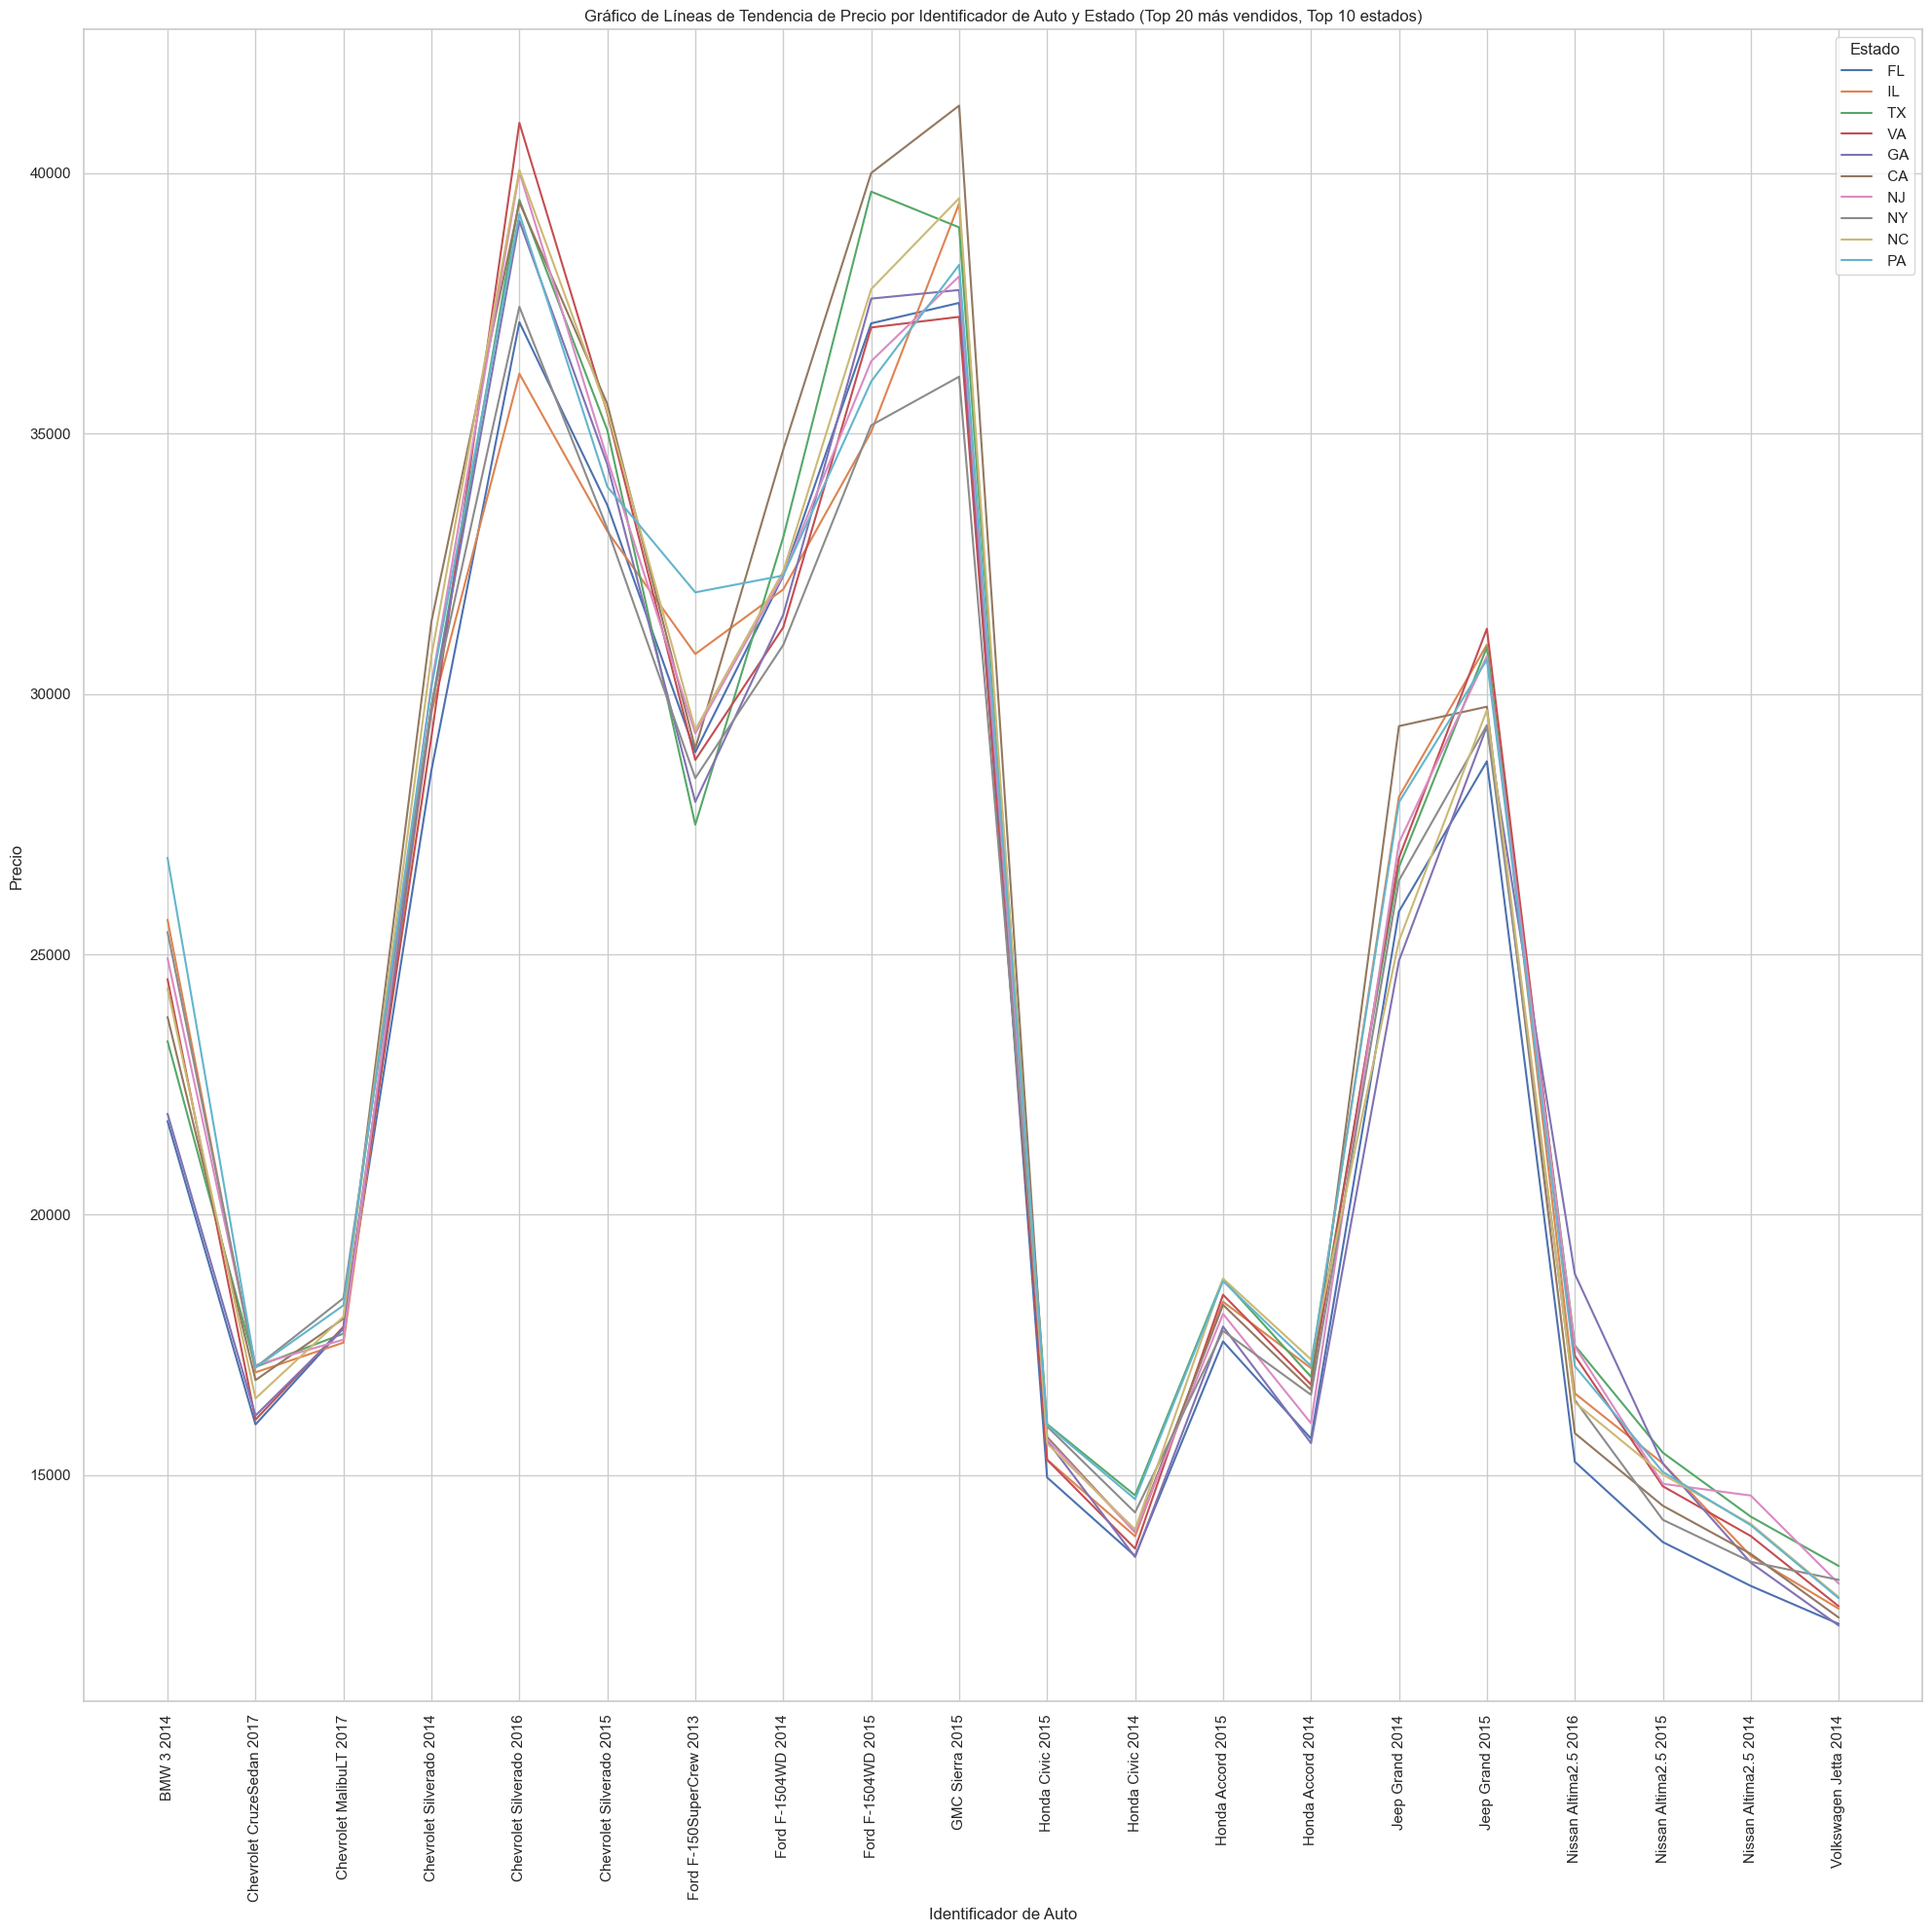

In [21]:
# Obtener los 30 tipos de auto más vendidos
top_20_cars = data['CarIdentifier'].value_counts().head(20).index.tolist()

# Filtrar los datos para obtener solo los atributos necesarios
scatter_data = data[data['CarIdentifier'].isin(top_20_cars)][['Price', 'State', 'CarIdentifier']]

# Obtener los 20 estados con más ventas
top_10_states = scatter_data['State'].value_counts().head(10).index.tolist()

# Filtrar los datos nuevamente para incluir solo los 20 estados con más ventas
scatter_data = scatter_data[scatter_data['State'].isin(top_10_states)]

# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(20, 20))
sns.lineplot(x='CarIdentifier', y='Price', hue='State', data=scatter_data, ci=None)
plt.xticks(rotation=90)  # Rotar los nombres de los identificadores de auto para que sean legibles
plt.xlabel('Identificador de Auto')
plt.ylabel('Precio')
plt.title('Gráfico de Líneas de Tendencia de Precio por Identificador de Auto y Estado (Top 20 más vendidos, Top 10 estados)')
plt.legend(title='Estado')
plt.tight_layout()

# Mostrar el gráfico
plt.show()



En este  gráfico de líneas con líneas de tendencia. queremos mostrarle cómo varían los precios de los automóviles en función de los identificadores de auto y los estados en los que se realizaron las ventas. En este caso tenemos el top 10 de estados donde se realizaron ventas del top 20 de vehiculos mas vendidos y sus precios de venta. Entre los modelos que podemos observar con mas dispersion de precios tenemos BMW 3 2014, Ford F-150 Super Crew 2013 y GMC Sierra 2013.

# 3.- Modelamiento

In [22]:
data

,Price,Year,Mileage,City,State,Vin,Make,Model,PriceInterval,MileageInterval,CarIdentifier,CarType
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed,<10k,25000-50000,Acura ILX6-Speed 2014,Acura ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed,10k-20k,0-25000,Acura ILX5-Speed 2013,Acura ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed,<10k,25000-50000,Acura ILX6-Speed 2013,Acura ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed,10k-20k,25000-50000,Acura ILX5-Speed 2014,Acura ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic,10k-20k,0-25000,Acura ILXAutomatic 2016,Acura ILXAutomatic
...,...,...,...,...,...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6,>60k,0-25000,Volvo S90T6 2017,Volvo S90T6
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6,>60k,0-25000,Volvo XC90T6 2017,Volvo XC90T6
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD,50k-60k,25000-50000,Volvo XC90AWD 2016,Volvo XC90AWD
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90,>60k,0-25000,Volvo V90 2017,Volvo V90


In [23]:
# Seleccionar los 30 estados más representativos
#top_states = data['State'].value_counts().head(30).index
#data_f = data[data['State'].isin(top_states)]

# Aplicar los filtros a los datos
data_f2 = data[(data['Year'] >= 2014) &
            (data['Price'] >= 10000) & (data['Price'] <= 30000) &
            (data['Mileage'] < 40000)]

# Calcular el porcentaje de filas respecto al DataFrame inicial
porcentaje = (data_f2.shape[0] / data.shape[0]) * 100

# Imprimir el porcentaje
print(f"El porcentaje de filas respecto al DataFrame inicial es: {porcentaje:.2f}%")

El porcentaje de filas respecto al DataFrame inicial es: 32.31%


Procedimos a a seleccionar los 30 estados con mas datos en el dataframe y los almacenamos en la variable top_states, despues a etos datos le aplicamos los filtros para la variable year, price y mileage, para los años mayor igual a 2014 y menor igual a 2018, para precio mayor igual a 10.000 dolares y menor igual a 30.000 dolares y encuanto a millas menores a 40.000 millas, todo esto basado en nuestras reglas de negocio descritas en nuestro resumen ejecutivo. Despues de esto calculamos el porcentaje de filas respecto al dataframe original el cual es de un 32% despues de la segmentación.

In [24]:

# Seleccionar los 30 estados más representativos
top_states = data['State'].value_counts().head(30).index
data = data[data['State'].isin(top_states)]


# Aplicar los filtros a los datos
data = data[(data['Year'] >= 2011) & (data['Year'] <= 2018) &
            (data['Price'] >= 10000) & (data['Price'] <= 30000) &
            (data['Mileage'] < 40000)]

# Preprocesamiento de datos
data = data.drop(['Vin', 'City', 'State', 'CarIdentifier', 'CarType','MileageInterval','PriceInterval'], axis=1)
data = pd.get_dummies(data, columns=['Make', 'Model'], drop_first=True)

# Dividir los datos en conjunto de entrenamiento y prueba
X = data.drop(['Price'], axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



En el codigo volvemos a generar el filtrado por nuestras reglas de negocio, realizamos en pre proesmaiento de la data haciendo drop de las columnas Vin', 'City', 'State', 'CarIdentifier', 'CarType', 'MileageInterval' y 'PriceInterval, obtenemos los get dummies de las columnas m'ake' y 'model'.
Separamos nuestros cojunto de datos de entramiento y de prueba donde en x realizamos drop del vector objetivo 'price'.Despues dividimos estos conjuntos en subconjuntos de entrenamiento (X_train, y_train) y prueba (X_test, y_test) utilizando la función train_test_split. se tomaron el 20% de los datos para el conjunto de prueba, y se utiliza un generador de números pseudoaleatorios random_state=42. Finalmente normalizamos el conjunto de datos entrenamiento y prueba.

In [25]:
# Crear y entrenar un modelo de Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

# Evaluar el modelo
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Error medio absoluto para regresion lineal es : {mae_lr}")

Error medio absoluto para regresion lineal es : 335065.174904127


Procedemos a entrenar y a evaluar nuestro modelo de regresion lineal, el cual nos arrojo un Error medio Absoluto de 248.369,63. Esto significa que en promedio, las predicciones del modelo de Regresión Lineal tienen un error absoluto de alrededor de 248,369.63 Dolares, en comparación con los valores reales de los precios de los vehiculos en el conjunto de prueba.

In [26]:
# Crear y entrenar un modelo de Random Forest con menos estimadores
rf_model = RandomForestRegressor(n_estimators=30, max_depth=8, min_samples_split=5, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluar el modelo
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Error medio absoluto para Random Forest: {mae_rf}")

Error medio absoluto para Random Forest: 3776.6126008111028


Procedemos a entrenar y a evaluar el modelo de Random Forest donde definimos los siguientes hiper parametros,  realizaremos un maximo de 30 arboles, co una profundidad para cada arbol de 8, un min_samples_split de 5 para dividir los subnodos del arbol, y un radom state de 42. el resultado de este modelo nos arroja un error medio absoluto de 3.776,61 dolares en comparacion con el con los valores reales de los precios de vehiculos del conjunto de prueba.

In [27]:
# Crear y entrenar un modelo de Regresión de Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=50, max_depth=3, learning_rate=0.1, random_state=42)  # Ajusta los hiperparámetros según tu necesidad
gb_model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluar el modelo
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print(f"Error medio absoluto para Regresión de Gradient Boosting: {mae_gb}")


Error medio absoluto para Regresión de Gradient Boosting: 3680.764092976519


procedemos a entrenar y evaluar el modelo Gradient Boosting Regressor donde consideramos los siguientes hiper parametros: n_stimator, indicamos el numero de arboles de 50, con una profundidad de maxima de 3, con una tasa de aprendizaje para cada arbol de 0.1 con el radom_state de 42, donde obtuvimos un error medio abosulto de 3.680,76 Dolares en comparacion con el con los valores reales de los precios de vehiculos del conjunto de prueba.

# 4.- Mejoramiento de modelos


## 4.1- INGESTA DE NUEVOS DATOS
Posteriormente al trabajo de modelamiento de modelos y la presentacion de metricas, procedimos a complementar nuestra información con la inyección de nuevos datos por medio de la documentacion de los mismos gracias a la API de NHTSA, la National Highway Traffic Safety Administration de USA, como habiamos comentado anteriormente.

In [28]:
#filtramos por lo que definimos
data = data[(data['Year'] >= 2014) &
            (data['Price'] >= 10000) & (data['Price'] <= 30000) &
            (data['Mileage'] < 40000) ]
print(data.shape)
data.head(2)

(253634, 1346)


,Price,Year,Mileage,Make_Audi,Make_BMW,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,...,Model_tC2dr,Model_tCAutomatic,Model_tCManual,Model_xB5dr,Model_xB686,Model_xBAutomatic,Model_xBManual,Model_xD5dr,Model_xDAutomatic,Model_xDManual
3,10999,2014,39922,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,14799,2016,22142,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


realizamos una segmenteacion de los datos por  parametros de negocios que ya definimos que son vehiculos con un año de fabricación mmayor e igual a 2014, con un precio mayor e igual a 10.000 Dolares y menores e iguales a 30.000 Dolres y con millas de recorrido menor a 40.000 millas.

In [29]:
#filtro solo por el estado de california
data['State'] = data['State'].str.strip()
data = data[data['State'] == 'CA']
data = data.reset_index(drop=True)
print(data.shape)
data.head(2)

KeyError: 'State'

posteriormente filtramos los vehiculos por los datos antes mencionados ademas de colocar el filtro solo para la ciudad de california, generando un total de 29794 datos para nuestra muestra.

In [31]:
#función para extraer datos de la api por código de VIN
def get_vin_data(vin):
   url = f'https://vpic.nhtsa.dot.gov/api/vehicles/decodevin/{vin}?format=json'
   response = requests.get(url)
   if response.status_code == 200:
      return response.json()['Results']
   else:
      return None


#Ejemplo para extraer 1 dato con la api
vin_number = "JH4CU2F49EC005287"  
vehicle_data = get_vin_data(vin_number)
print(vehicle_data)

[{'Value': '', 'ValueId': '', 'Variable': 'Suggested VIN', 'VariableId': 142}, {'Value': '0', 'ValueId': '0', 'Variable': 'Error Code', 'VariableId': 143}, {'Value': '', 'ValueId': '', 'Variable': 'Possible Values', 'VariableId': 144}, {'Value': None, 'ValueId': '', 'Variable': 'Additional Error Text', 'VariableId': 156}, {'Value': '0 - VIN decoded clean. Check Digit (9th position) is correct.', 'ValueId': '', 'Variable': 'Error Text', 'VariableId': 191}, {'Value': 'JH4CU2F4*EC', 'ValueId': '', 'Variable': 'Vehicle Descriptor', 'VariableId': 196}, {'Value': None, 'ValueId': None, 'Variable': 'Destination Market', 'VariableId': 10}, {'Value': 'ACURA', 'ValueId': '475', 'Variable': 'Make', 'VariableId': 26}, {'Value': 'HONDA MOTOR CO., LTD', 'ValueId': '987', 'Variable': 'Manufacturer Name', 'VariableId': 27}, {'Value': 'TSX', 'ValueId': '1874', 'Variable': 'Model', 'VariableId': 28}, {'Value': '2014', 'ValueId': '', 'Variable': 'Model Year', 'VariableId': 29}, {'Value': 'SAYAMA', 'Value

Realizamos una funcion para obtner los datos proporcionados por la Administración Nacional de Seguridad del Tráfico en Carreteras (NHTSA) para obtener datos relacionados con el vehículo a partir de su VIN

In [32]:
#división del dataframe en partes iguales
division = np.array_split(data, 30)

#tamaño de los nuevos df
shape = division[0].shape
print(f"El tamaño de cada batch es:{shape}")

El tamaño de cada batch es:(8455, 1346)


Descargamos los datos en una separacion de en 30 partes iguales, para que la descarga de la data no tomara tanto tiempo y si estuviere propensa a error.

In [ ]:
#identificamos el nombre de las columnas
colnames = []
for i in list(vehicle_data):
    colnames.append(i['Variable'].strip())



for k, div in enumerate(division[19:], start=19):
    
    div = div.reset_index()

   
    api_responses = []

    
    for vin in div['Vin']:
        datos = get_vin_data(vin)
        filter_data = [{'Value': entry['Value']} for entry in datos] 
        filter_list = [i['Value'] for i in filter_data] 
        api_responses.append(filter_list)


    
    indices_a_eliminar = []

    for i, resp in enumerate(api_responses):
        if len(resp) != 136:
            indices_a_eliminar.append(i)


    api_responses = [x for x in api_responses if len(x) == 136]

    
    div = div.drop(indices_a_eliminar, axis=0)

    
    div = div.reset_index()

   

   
    api_df = pd.DataFrame(api_responses,columns = colnames)


    df = pd.concat([div, api_df], axis=1)

 
    nombre_archivo = f'datos_con_api_{k}.csv'

    # guarda dataframe para no volver a descargar la data
    df.to_csv(nombre_archivo, index=False)

    print(f"Batch {k}: Descarga completada.")


Batch 19: Descarga completada.
Batch 20: Descarga completada.
Batch 21: Descarga completada.
Batch 22: Descarga completada.
Batch 23: Descarga completada.
Batch 24: Descarga completada.
Batch 25: Descarga completada.
Batch 26: Descarga completada.
Batch 27: Descarga completada.
Batch 28: Descarga completada.
Batch 29: Descarga completada.


En este codigo procedemos a descargar la información proveniente de la API, primero Crea una lista vacía llamada colnames que se usará para almacenar los nombres de las columnas. luego realizamos un ciclo for para obtner los nombres de las columnas. Locorrimos una primera vez la cual descargó hasta el batch 18 y luego se desconectó y luego seguimos desde el batch 19, despues reseteamos el indice para que funcione el concatenar posterior, creamos una lista para guardar toda la data descargada.

Procedemos a iterar con otro ciclo for descargamos toda la data y filtramos del diccionario solamente el valor que es el que nos interesa, rescata solo "value" de cada diccionario, luego convierte el diccionario en una lista.

Al descargar los datos, algunas culumnas tienen 137 datos en vez de los 136 que deberian tener, lo que causa problemas al crear el dataframe, por lo que eliminamos las columnas con largo distinto con otro ciclo for, eliminamos las filas que no coinciden de los datos que descargamos, despues de estos eliminamos filas problematicas en el df, volvemos a hacer el reseteo del indice para que funcione el concatenar posterior.

Convertimos las datas descargadas en un Dataframe, despues lo concatenamos con el dataframe original para obtner un solo df.

luego le colocamos nombre a los archivos que vamos a ir descargando en formato csv y se guarda  con los datos descargados y procesados para cada lote específico.


In [ ]:
#Al dataframe original le agregamos las nuevas columnas con datos que descargamos con la api
#df = pd.concat([division[0], api_df], axis=1)
 #verificamos que el df quede con las mismas filas que el inicial
print(df.shape)
df[['Vehicle Descriptor', 'Vin']][:5] #revisamos que calcen los datos

(809, 146)


,Vehicle Descriptor,Vin
0,3VWD17AJ*GM,3VWD17AJ5GM259747
1,1VWAT7A3*GC,1VWAT7A3XGC030318
2,3VW4T7AU*FM,3VW4T7AU6FM022087
3,3VW167AJ*HM,3VW167AJ9HM245369
4,WVWBP7AN*EE,WVWBP7AN1EE535680


## 4.2 Exploracion de Datos nuevos.

In [35]:
rep_archivo = '/Users/felipemoreira/Library/CloudStorage/GoogleDrive-fmoreira01@gmail.com/Mi unidad/06 Data Science/01 Desafio_Latam/Proyecto DS G58/02 Análisis/Datos_API'


csv_files = [
    file for file in os.listdir(rep_archivo) if file.endswith('.csv')
    ]


df_2 = [pd.read_csv(os.path.join(rep_archivo, csv_file), encoding="latin1") for csv_file in csv_files]


combined_df_2 = pd.concat(df_2, ignore_index=True)

Procedemos a concatenar todos los csv en un solo data frame, utilizando un cilo for para iterar en la carpeta donde estan todos los csv,  despues creando dataframes de cada uno, utilizando comprension de listas para posteriormente concatenarlos todos en un solo df llamado df_2

In [36]:
combined_df_2

,level_0,index,Price,Year,Mileage,City,State,Vin,Make,Model,...,Pedestrian Automatic Emergency Braking (PAEB),Automatic Crash Notification (ACN) / Advanced Automatic Crash Notification (AACN),Daytime Running Light (DRL),Headlamp Light Source,Semiautomatic Headlamp Beam Switching,Adaptive Driving Beam (ADB),Rear Cross Traffic Alert,Rear Automatic Emergency Braking,Blind Spot Intervention (BSI),Lane Centering Assistance
0,0,9934,25700,2015,33337,Vista,CA,1FMZK1YM4FKB21928,Ford,Transit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,9935,24995,2015,13536,Tracy,CA,1FA6P8THXF5371156,Ford,MustangFastback,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,9936,22700,2014,31971,Moreno Valley,CA,2FMGK5C81EBD45191,Ford,FlexSEL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,9937,28515,2016,17925,Porterville,CA,1FBZX2ZM3GKA44677,Ford,Transit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,9938,27998,2016,37633,Bellflower,CA,1FMJK1HT8GEF36738,Ford,Expedition,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28646,987,21844,18055,2016,38845,Victorville,CA,KNMAT2MT9GP697746,Nissan,RogueSV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28647,988,21845,13649,2015,20970,Sunnyvale,CA,1N4AZ0CP7FC309058,Nissan,LEAFSL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28648,989,21846,18898,2017,27943,El Monte,CA,KNMAT2MT7HP511221,Nissan,RogueSV,...,NaN,NaN,Standard,NaN,Standard,NaN,NaN,NaN,NaN,NaN
28649,990,21847,12488,2015,34051,Petaluma,CA,1N4AZ0CP5FC302996,Nissan,LEAFS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
combined_df_2.info(9
                   )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28651 entries, 0 to 28650
Data columns (total 146 columns):
 #    Column                                                                             Dtype  
---   ------                                                                             -----  
 0    level_0                                                                            int64  
 1    index                                                                              int64  
 2    Price                                                                              int64  
 3    Year                                                                               int64  
 4    Mileage                                                                            int64  
 5    City                                                                               object 
 6    State                                                                              object 
 7    Vin        

Realizamos un drop de los datos duplicados de la columna vin

In [48]:
unique_vin_df = combined_df_2.drop_duplicates(subset=['Vin'])


In [40]:
null_counts = unique_vin_df.isnull().sum()

total_rows = len(unique_vin_df)

threshold = 0.2 * total_rows

columns_to_keep = null_counts[null_counts <= threshold].index

new_df = unique_vin_df[columns_to_keep]

En este código calcula la cantidad de valores nulos en cada columna del dataFrame y crea una Serie que almacena el número de valores nulos por columna.
despues se calcula el número total de filas en el dataFrame donde decimos que el umbral datos nulos permitidos es del 20%. Luego filtramos las columnas con menos de 20% de datos nulos y creamos un dataframe con esas columnas.

In [41]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28650 entries, 0 to 28650
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   level_0                                      28650 non-null  int64  
 1   index                                        28650 non-null  int64  
 2   Price                                        28650 non-null  int64  
 3   Year                                         28650 non-null  int64  
 4   Mileage                                      28650 non-null  int64  
 5   City                                         28650 non-null  object 
 6   State                                        28650 non-null  object 
 7   Vin                                          28650 non-null  object 
 8   Make                                         28650 non-null  object 
 9   Model                                        28650 non-null  object 
 10

In [43]:
num_rows_combined_df_2 = len(combined_df_2)
num_columns_combined_df_2 = len(combined_df_2.columns)
num_rows_df_final = len(new_df)
num_columns_df_final = len(new_df.columns)


percentage_rows_retained = (num_rows_df_final / num_rows_combined_df_2) * 100
percentage_columns_retained = (num_columns_df_final / num_columns_combined_df_2) * 100

print(f"Número de filas en combined_df_2: {num_rows_combined_df_2}")
print(f"Número de columnas en combined_df_2: {num_columns_combined_df_2}")
print(f"Número de filas en df_final: {num_rows_df_final}")
print(f"Número de columnas en df_final: {num_columns_df_final}")

print(f"El porcentaje de filas retenidas es: {percentage_rows_retained:.2f}%")
print(f"El porcentaje de columnas retenidas es: {percentage_columns_retained:.2f}%")

Número de filas en combined_df_2: 28651
Número de columnas en combined_df_2: 146
Número de filas en df_final: 28650
Número de columnas en df_final: 38
El porcentaje de filas retenidas es: 100.00%
El porcentaje de columnas retenidas es: 26.03%


en este codigo realizamos un conteo de numero de filas y columnas del primer dataframe de entrenamiento y de test con este nuevo depurado:
Número de filas en combined_df_2: 28651
Número de columnas en combined_df_2: 146
Número de filas en df_final: 21396
Número de columnas en df_final: 17
El porcentaje de filas retenidas es: 74.68%
El porcentaje de columnas retenidas es: 11.64%

In [44]:
cleaned_df = new_df.dropna()

Eliminamos las filas que contienen al menos un valor nulo del dataframe, y crea uno nuevo.

In [46]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21396 entries, 1 to 28650
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   level_0                                      21396 non-null  int64  
 1   index                                        21396 non-null  int64  
 2   Price                                        21396 non-null  int64  
 3   Year                                         21396 non-null  int64  
 4   Mileage                                      21396 non-null  int64  
 5   City                                         21396 non-null  object 
 6   State                                        21396 non-null  object 
 7   Vin                                          21396 non-null  object 
 8   Make                                         21396 non-null  object 
 9   Model                                        21396 non-null  object 
 10

In [49]:
for column in cleaned_df.columns:
    unique_values = cleaned_df[column].unique()
    print(f"Valores únicos en la columna '{column}':")
    print(unique_values)
    print()

Valores únicos en la columna 'level_0':
[  1   2   5   7   9  12  13  14  17  18  20  22  23  24  27  29  30  31
  32  33  34  35  37  38  39  40  41  42  43  46  47  48  50  51  54  55
  57  58  59  60  62  63  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95
  96  97  98  99 100 101 102 103 104 105 106 107 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 126 127 128 129 130 131 132 133 135
 136 138 139 140 141 142 143 144 145 147 148 149 150 151 152 153 154 155
 156 157 159 162 164 165 167 169 172 173 174 175 176 177 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 196 198 202 203 204 208 210
 212 213 216 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287
 288 289 29

Iteramos con un ciclo for para obtener los valores unicos para la cada columna del dataframe

In [51]:
to_drop = ['Motorcycle Chassis Type','Motorcycle Suspension Type', 'Custom Motorcycle Type', 'Bus Type', 'Bus Floor Configuration Type', 'Seat Belt Type',
           'Trailer Body Type', 'Trailer Type Connection', 'Plant Country', 'Plant City', 'Model.1', 'Manufacturer Name', 'Vehicle Descriptor','Make.1',
            'Error Text', 'Error Code','Vin', 'State', 'City','index', 'level_0']
df_final = cleaned_df.drop(columns=to_drop)
df_final.head()

,Price,Year,Mileage,Make,Model,Model Year,Vehicle Type,Body Class,Doors,Engine Number of Cylinders,Displacement (CC),Displacement (CI),Displacement (L),Fuel Type - Primary,Front Air Bag Locations,Side Air Bag Locations,Tire Pressure Monitoring System (TPMS) Type
1,24995,2015,13536,Ford,MustangFastback,2015.0,PASSENGER CAR,Coupe,2.0,4.0,2300.0,140.354611,2.3,Gasoline,1st Row (Driver and Passenger),1st and 2nd Rows,Direct
2,22700,2014,31971,Ford,FlexSEL,2014.0,MULTIPURPOSE PASSENGER VEHICLE (MPV),Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,4.0,6.0,3500.0,213.583104,3.5,Gasoline,1st Row (Driver and Passenger),1st and 2nd and 3rd Rows,Direct
5,25000,2016,37503,Ford,FlexLimited,2016.0,MULTIPURPOSE PASSENGER VEHICLE (MPV),Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,4.0,6.0,3500.0,213.583104,3.5,Gasoline,1st Row (Driver and Passenger),1st and 2nd and 3rd Rows,Direct
7,24498,2015,20740,Ford,MustangFastback,2015.0,PASSENGER CAR,Coupe,2.0,4.0,2300.0,140.354611,2.3,Gasoline,1st Row (Driver and Passenger),1st and 2nd Rows,Direct
9,24834,2015,26247,Ford,FlexSEL,2015.0,MULTIPURPOSE PASSENGER VEHICLE (MPV),Sport Utility Vehicle (SUV)/Multi-Purpose Vehi...,4.0,6.0,3500.0,213.583104,3.5,Gasoline,1st Row (Driver and Passenger),1st and 2nd and 3rd Rows,Direct


Basados en nuestro analisis gestionamos el descarte de las columnas que no ofrecen datos relevantes para el calculo de precio de nuestro modelo o que tienen atributos repetidos en otras columnas.

In [52]:
df_total = pd.get_dummies(df_final)
df_total

,Price,Year,Mileage,Model Year,Doors,Engine Number of Cylinders,Displacement (CC),Displacement (CI),Displacement (L),Make_Acura,...,Fuel Type - Primary_Gasoline,Front Air Bag Locations_1st Row (Driver and Passenger),Front Air Bag Locations_Driver Seat Only,Side Air Bag Locations_1st Row (Driver and Passenger),Side Air Bag Locations_1st and 2nd Rows,Side Air Bag Locations_1st and 2nd and 3rd Rows,Side Air Bag Locations_All Rows,Side Air Bag Locations_Driver Seat Only,Tire Pressure Monitoring System (TPMS) Type_Direct,Tire Pressure Monitoring System (TPMS) Type_Indirect
1,24995,2015,13536,2015.0,2.0,4.0,2300.0,140.354611,2.3,0,...,1,1,0,0,1,0,0,0,1,0
2,22700,2014,31971,2014.0,4.0,6.0,3500.0,213.583104,3.5,0,...,1,1,0,0,0,1,0,0,1,0
5,25000,2016,37503,2016.0,4.0,6.0,3500.0,213.583104,3.5,0,...,1,1,0,0,0,1,0,0,1,0
7,24498,2015,20740,2015.0,2.0,4.0,2300.0,140.354611,2.3,0,...,1,1,0,0,1,0,0,0,1,0
9,24834,2015,26247,2015.0,4.0,6.0,3500.0,213.583104,3.5,0,...,1,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28644,24750,2017,26092,2017.0,4.0,6.0,3500.0,213.583104,3.5,0,...,1,1,0,1,0,0,0,0,1,0
28645,18955,2016,28003,2016.0,4.0,4.0,2500.0,152.559360,2.5,0,...,1,1,0,1,0,0,0,0,1,0
28646,18055,2016,38845,2016.0,4.0,4.0,2500.0,152.559360,2.5,0,...,1,1,0,1,0,0,0,0,1,0
28648,18898,2017,27943,2017.0,4.0,4.0,2500.0,152.559360,2.5,0,...,1,1,0,1,0,0,0,0,1,0


Realizamos un get dummies para gestionar las variables categoricas en numericas para gestionar nuestro entremiento de modelos.

In [53]:
df_total.info(9
              )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21396 entries, 1 to 28650
Data columns (total 609 columns):
 #    Column                                                              Dtype  
---   ------                                                              -----  
 0    Price                                                               int64  
 1    Year                                                                int64  
 2    Mileage                                                             int64  
 3    Model Year                                                          float64
 4    Doors                                                               float64
 5    Engine Number of Cylinders                                          float64
 6    Displacement (CC)                                                   float64
 7    Displacement (CI)                                                   float64
 8    Displacement (L)                                                

## 4.3.- Modelamiento de Data Mejorada

In [54]:

X = df_total.drop(['Price'], axis=1)
y = df_total['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Dividimos nuestros datos de conjunto de entreamiento y prueba, realizando un drop de nuestra variable objetivo la columna Price, con una prueba de test de un 0.33 y un random state de 42, normalizamos los caracteres numericos con standar scaler

In [55]:

# Crear y entrenar un modelo de Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)




y_pred_lr = lr_model.predict(X_test)


# Evaluar el modelo
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Error medio absoluto para regresion lineal es : {mae_lr}")

Error medio absoluto para regresion lineal es : 484918.13208244025


Procedemos a entrenar y a evaluar nuestro modelo de regresion lineal, el cual nos arrojo un Error medio Absoluto de 248.369,63. Esto significa que en promedio, las predicciones del modelo de Regresión Lineal tienen un error absoluto de alrededor de 48.360 Dolares, en comparación con los valores reales de los precios de los vehiculos en el conjunto de prueba.

In [56]:
# Crear y entrenar un modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=30, max_depth=8, min_samples_split=5, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluar el modelo
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"Error medio absoluto para Random Forest: {mae_rf}")

Error medio absoluto para Random Forest: 2126.4309965756997


Procedemos a entrenar y a evaluar el modelo de Random Forest donde definimos los siguientes hiper parametros,  realizaremos un maximo de 30 arboles, co una profundidad para cada arbol de 8, un min_samples_split de 5 para dividir los subnodos del arbol, y un radom state de 42. el resultado de este modelo nos arroja un error medio absoluto de 2.126 dolares en comparacion con el con los valores reales de los precios de vehiculos del conjunto de prueba.

In [57]:
# Crear y entrenar un modelo de Regresión de Gradient Boosting
gb_model = GradientBoostingRegressor(n_estimators=50, max_depth=3, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluar el modelo
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print(f"Error medio absoluto para Regresión de Gradient Boosting: {mae_gb}")

Error medio absoluto para Regresión de Gradient Boosting: 2304.0065858208186


procedemos a entrenar y evaluar el modelo Gradient Boosting Regressor donde consideramos los siguientes hiper parametros: n_stimator, indicamos el numero de arboles de 50, con una profundidad de maxima de 3, con una tasa de aprendizaje para cada arbol de 0.1 con el radom_state de 42, donde obtuvimos un error medio abosulto de 2.304 Dolares en comparacion con el con los valores reales de los precios de vehiculos del conjunto de prueba.

In [61]:
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Para problemas de regresión
    max_depth=3,                    # Profundidad máxima del árbol
    learning_rate=0.1,              # Tasa de aprendizaje
    n_estimators=100                # Número de árboles en el ensemble
)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
print("Error Absoluto Medio del modelo:", mae)


r2 = r2_score(y_test, y_pred)
print("Coeficiente de Determinación (R²) del modelo:", r2)

Error Absoluto Medio del modelo: 2028.5903213127124
Coeficiente de Determinación (R²) del modelo: 0.7351696522793578


Procedemos a entrenar y evaluar el modeo Xtreme Gradent Boosting Regressor hiper parametros: n_stimator, indicamos el numero de arboles de 100, con una profundidad de maxima de 3, con una tasa de aprendizaje para cada arbol de 0.1, donde obtuvimos un error medio abosulto de 2.028 Dolares en comparacion con el con los valores reales de los precios de vehiculos del conjunto de prueba.  Además esto obtuvimos un coeficiente de determinacion R2, para obtner el porcentaje de ajuste del modelo con un 73% de ajuste sobre las predicciones.

## 4.4.- Mejoramiento de Hiperparámetros

In [65]:
models = [
    
    ('Random Forest', RandomForestRegressor(), {
        'n_estimators': [50,100],
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10]
    }),
    ('XGBoost', xgb.XGBRegressor(), {
        'max_depth': [3, 4, 5],
        'learning_rate': [0.1, 0.01],
        'n_estimators': [100, 200]
    }),
    ('Gradient Boosting', GradientBoostingRegressor(), {
        'n_estimators': [50,100],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.1, 0.01]
    })
]

results = []

for name, model, param_grid in models:
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    results.append({'Model': name, 'R²': r2, 'MAE': mae, 'MSE': mse})


results_df = pd.DataFrame(results)


print(results_df)


               Model        R²          MAE           MSE
0      Random Forest  0.849160  1424.312967  3.907651e+06
1            XGBoost  0.828573  1584.113869  4.440976e+06
2  Gradient Boosting  0.798869  1737.005156  5.210485e+06


Creamos una grilla con varios hiperparámetros de los modelos ya estudiados donde se implementan a cada modelo distintos hiper parametros a para verificar cual se ajusta mejor a cada uno de ellos y los almacenamos en una lista, posteriormente procedemos a entrenar los modelos con los mejores estimadores y luego gestiones el test con los mejores modelos y creamos un df con los resultados:

               Model        R²          MAE           MSE
0      Random Forest  0.849415  1421.872396  3.901036e+06
1            XGBoost  0.828573  1584.113869  4.440976e+06
2  Gradient Boosting  0.799021  1736.746494  5.206526e+06

para Random Forest r2: de porcentaje de ajuste del modelo con un 84% de ajuste sobre las predicciones, donde obtuvimos un error medio abosulto de 1.421 Dolares en comparacion con el con los valores reales de los precios de vehiculos del conjunto de prueba, error cuadratico medio MSE 3,9 para obtner la comparacion entre modelo.

para XGBoost r2: de porcentaje de ajuste del modelo con un 82% de ajuste sobre las predicciones, donde obtuvimos un error medio abosulto de 1.584 Dolares en comparacion con el con los valores reales de los precios de vehiculos del conjunto de prueba, error cuadratico medio MSE 4,4 para obtner la comparacion entre modelo.

para Gradient Boosting r2: de porcentaje de ajuste del modelo con un 79% de ajuste sobre las predicciones, donde obtuvimos un error medio abosulto de 1.736 Dolares en comparacion con el con los valores reales de los precios de vehiculos del conjunto de prueba, error cuadratico medio MSE 5,2 para obtner la comparacion entre modelo